In [ ]:
pip show synthia

Name: synthia
Version: 1.1.0
Summary: Multidimensional synthetic data generation in Python
Home-page: https://github.com/dmey/synthia
Author: D. Meyer, T. Nagler
Author-email: 
License: MIT
Location: /opt/homebrew/Caskroom/miniconda/base/envs/ml38/lib/python3.8/site-packages
Requires: bottleneck, numpy, scipy, xarray
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
import numpy as np
import synthia as syn

In [9]:
# Load the original data    
data  = pd.read_csv("/Users/sanjju/projects/datasets/crude_oil_import_prices.csv", index_col=0)    

# Get file datatypes    
dtypes = data.dtypes    

# Get the names of the columns with numeric types    
numeric = data.columns[dtypes.apply(pd.api.types.is_numeric_dtype)]    

# Extract numeric subset    
subset = data.loc[:,numeric].replace(np.nan, 0)

In [10]:
# Create Generator    
generator = syn.CopulaDataGenerator() 



In [12]:
# Define Coupla and Parameterizer    
parameterizer = syn.QuantileParameterizer(n_quantiles=100)       


In [13]:
generator.fit(subset, copula=syn.GaussianCopula(), parameterize_by=parameterizer)   


AssertionError: 

In [14]:
!pip install sdv


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.6/124.6 kB 1.2 MB/s eta 0:00:0031m69.0 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 1.2 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.9/66.9 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 kB 989.3 kB/s eta 0:00:001m889.5 kB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 1.2 MB/s eta 0:00:000:00:01m eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.1/145.1 kB 1.0 MB/s eta 0:00:001m298.8 kB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 1.5 MB/s eta 0:00:00m eta 0:00:010:00:01
  Attempting uninstall: plotly
    Found existing installation: plo

In [15]:
data = pd.read_csv('/Users/sanjju/projects/datasets/crude_oil_import_prices.csv')
data.head()

,index,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,0,AUS,OILIMPPRICE,TOT,USD_BAR,A,1980,31.81,NaN
1,1,AUS,OILIMPPRICE,TOT,USD_BAR,A,1981,35.88,NaN
2,2,AUS,OILIMPPRICE,TOT,USD_BAR,A,1982,35.42,NaN
3,3,AUS,OILIMPPRICE,TOT,USD_BAR,A,1983,30.88,NaN
4,4,AUS,OILIMPPRICE,TOT,USD_BAR,A,1984,29.19,NaN


In [24]:
!pip show sdv

Name: sdv
Version: 1.2.0
Summary: Generate synthetic data for single table, multi table and sequential data
Home-page: https://github.com/sdv-dev/SDV
Author: DataCebo, Inc.
Author-email: info@sdv.dev
License: BSL-1.1
Location: /opt/homebrew/Caskroom/miniconda/base/envs/ml38/lib/python3.8/site-packages
Requires: boto3, botocore, cloudpickle, copulas, ctgan, deepecho, Faker, graphviz, numpy, pandas, rdt, sdmetrics, tqdm
Required-by: 


In [25]:
import sdv

In [26]:
from sdv.tabular import GaussianCopula
model = GaussianCopula()
model.fit(data)

ModuleNotFoundError: No module named 'sdv.tabular'

In [31]:

import pandas as pd
import numpy as np
import synthia as syn
import argparse
import warnings, pickle, sys
warnings.filterwarnings('ignore')


parser = argparse.ArgumentParser()      
parser.add_argument('files', type=argparse.FileType('r'), nargs='+')
parser.add_argument('-i','--independant', action='store_false')
args = parser.parse_args()


coupled = args.independant



def get_synthetic_data():

    # Load the original data
    data  = pd.read_csv("/Users/sanjju/projects/datasets/crude_oil_import_prices.csv", index_col=0)
    # Get file datatypes
    dtypes = data.dtypes
    # Get the names of the columns with numeric types
    numeric = data.columns[dtypes.apply(pd.api.types.is_numeric_dtype)]
    # Extract numeric subset
    subset = data.loc[:,numeric].replace(np.nan, 0)

    # Create Generator
    generator = syn.CopulaDataGenerator()

    # Define Coupla and Parameterizer
    if coupled:
        parameterizer = syn.QuantileParameterizer(n_quantiles=100)
        generator.fit(subset, copula=syn.GaussianCopula(), parameterize_by=parameterizer)
    else:
        generator.fit(subset, copula=syn.IndependenceCopula())


    print(f'Storage size: {len(pickle.dumps(generator))} bytes')

    # Generate our samples to the same shape as the original data
    samples = generator.generate(n_samples=len(subset), uniformization_ratio=0, stretch_factor=1)
    synthetic = pd.DataFrame(samples, columns = subset.columns, index = subset.index)

    # Create a new dataframe with the synthetic data
    update = data.loc[:]
    update.loc[:,numeric]= synthetic.loc[:,numeric]
    update = update.astype(dtypes)

    # save the new dataframe
    update.to_csv(fname.replace('.csv', '_synthetic.csv'))


if __name__ == '__main__':

    # for fname in args.files:
    #     print(f'Processing {fname.name}')
    get_synthetic_data()


usage: ipykernel_launcher.py [-h] [-i] files [files ...]
ipykernel_launcher.py: error: unrecognized arguments: -f


SystemExit: 2

Using sklearn direct make_something 

In [2]:
from sklearn.datasets import make_classification, make_regression

X, y = make_classification(n_samples=50, n_informative=5, n_classes=3, n_clusters_per_class=3)

In [4]:
import pandas as pd
X_df = pd.DataFrame(X)
y_df = pd.DataFrame(y)
X_df["target"] = y_df
X_df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,target
0,0.198302,-3.348414,-0.572171,0.915501,-2.469705,2.089844,0.205771,-0.384581,1.017645,-0.462659,...,0.301470,-0.064059,3.345067,2.475385,-0.033753,-2.776629,1.264676,1.805852,-1.034318,1
1,0.467426,-1.653751,0.579585,0.770727,0.965664,-0.510685,-0.060342,-3.199348,-0.186562,-3.011943,...,0.437207,-0.568295,0.437056,-1.074776,-0.839532,1.515080,-1.478734,-0.823212,-1.734999,0
2,-0.049958,0.225161,-1.009819,1.032423,-0.086021,0.451561,0.141304,-0.896413,-0.212936,-1.563830,...,-0.349708,2.118647,-1.392445,-0.866348,-1.103762,2.343052,1.337859,1.033657,-0.469772,0
3,-1.731551,-0.671302,1.751835,-1.293871,-1.121204,-0.813485,2.569463,-0.063377,0.628588,0.896844,...,1.146181,-1.438422,0.967118,0.696396,0.424131,0.336531,-0.595264,-0.995260,0.876974,1
4,-1.365485,-2.626567,0.458573,1.491574,1.755355,0.613708,-1.430265,-1.175663,1.808026,-2.346050,...,1.038885,1.119849,1.726664,-1.329941,1.847701,-0.800108,-1.112475,-0.480251,-1.160533,1


In [5]:
X, y = make_regression(n_samples=50, n_features=15, n_informative=8)


Using Faker module

In [8]:
!pip show faker

Name: Faker
Version: 14.2.1
Summary: Faker is a Python package that generates fake data for you.
Home-page: https://github.com/joke2k/faker
Author: joke2k
Author-email: joke2k@gmail.com
License: MIT License
Location: /opt/homebrew/Caskroom/miniconda/base/envs/ml38/lib/python3.8/site-packages
Requires: python-dateutil
Required-by: rdt, sdv


In [9]:
from faker import Faker 

fake = Faker()

In [10]:
fake.name()

'Jonathan Allen'

In [13]:
df = pd.DataFrame([
{
"name":fake.name(),
"address": fake.address(),
"birthday": fake.date_of_birth(),
"email": fake.email(),
}
    for _ in range(100)
])

In [14]:
df.head()

,name,address,birthday,email
0,Michael Pena,"07063 Morgan Mission Apt. 753\nMariahaven, CA ...",2001-12-27,freemannathan@example.com
1,Rebecca Cohen MD,"5774 Stewart Island Apt. 645\nTonyafort, TX 05338",1980-09-10,ngarcia@example.com
2,Jennifer Nguyen,Unit 7220 Box 5228\nDPO AE 40954,1925-05-05,jesseprice@example.org
3,Claudia Orr,"59270 Cole Motorway\nEast Christine, MD 99637",1917-03-04,qolsen@example.net
4,Sharon Bryant,"908 Alan Plains\nNew Kristen, SC 78987",1988-09-02,uortiz@example.org


Using pyOD library

In [16]:
!pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 443.7 kB/s eta 0:00:001m428.6 kB/s eta 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.1.0-py3-none-any.whl size=185349 sha256=947498de408394a674f0c4d7f2cddc2e0f088e739e68e7e66c39c2b362c6387e
  Stored in directory: /Users/sanjju/Library/Caches/pip/wheels/77/4e/a8/442459c5124a54438dd0f2f4a48aa089d26735e3d798a6e0af
Successfully built pyod


In [17]:
from pyod.utils.data import generate_data
import seaborn as sns 
import matplotlib.pyplot as plt 

In [18]:
X, y = generate_data(
    n_train=40, contamination=0.05, n_features=2, train_only=True, random_state=1
)

X_df = pd.DataFrame(X)
X_df["is_anomaly"] = pd.DataFrame(y)



<AxesSubplot: xlabel='0', ylabel='1'>

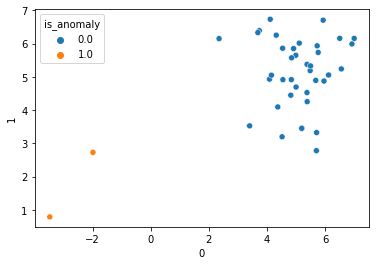

In [19]:
sns.scatterplot(data=X_df, x=0, y=1, hue="is_anomaly")

Using ctgan

In [20]:
!pip show ctgan

Name: ctgan
Version: 0.7.3
Summary: Create tabular synthetic data using a conditional GAN
Home-page: https://github.com/sdv-dev/CTGAN
Author: DataCebo, Inc.
Author-email: info@sdv.dev
License: BSL-1.1
Location: /opt/homebrew/Caskroom/miniconda/base/envs/ml38/lib/python3.8/site-packages
Requires: numpy, packaging, pandas, rdt, torch
Required-by: sdv


In [ ]:
from ctgan import CTGAN 
from ctgan import load_demo 

real_data = load_demo()

discrete_columns = [
'workclass', 
]

ctgan = CTGAN(epochs=10)
ctgan.fit(real_data, discrete_columns)

synthetic_data = ctgan.sample(1000)

In [22]:
import seaborn as sns
import pandas as pd
from ctgan import CTGAN

In [23]:
iris_data = sns.load_dataset("iris")

In [31]:
categorical_features= iris_data.select_dtypes(exclude="number").columns.tolist()

In [32]:
categorical_features

['species']

In [33]:
ctgan = CTGAN(epochs=5)
ctgan.fit(iris_data, categorical_features)

/opt/homebrew/Caskroom/miniconda/base/envs/ml38/lib/python3.8/site-packages/rdt/transformers/base.py:132: FutureWarning: Future versions of RDT will not support the 'model_missing_values' parameter. Please switch to using the 'missing_value_generation' parameter to select your strategy.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/ml38/lib/python3.8/site-packages/rdt/transformers/base.py:132: FutureWarning: Future versions of RDT will not support the 'model_missing_values' parameter. Please switch to using the 'missing_value_generation' parameter to select your strategy.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/ml38/lib/python3.8/site-packages/rdt/transformers/base.py:132: FutureWarning: Future versions of RDT will not support the 'model_missing_values' parameter. Please switch to using the 'missing_value_generation' parameter to select your strategy.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/ml38/lib/python3.8/site-packages/rdt/trans

In [34]:
synthetic_iris = ctgan.sample(1000)
synthetic_iris.head(20)

,sepal_length,sepal_width,petal_length,petal_width,species
0,7.179941,2.404883,4.138424,1.703750,setosa
1,5.907500,3.676692,4.931408,2.648358,virginica
2,5.011217,2.534879,6.587828,2.595097,versicolor
3,4.528894,3.133289,4.851490,0.455277,virginica
4,5.379118,2.483151,1.206518,2.240143,setosa
5,5.004515,2.748193,2.049141,-0.148424,setosa
6,5.023698,3.629330,2.466910,0.675432,versicolor
7,3.772370,3.682535,6.198116,1.745771,versicolor
8,6.028028,3.109090,1.759783,0.706763,versicolor
9,4.569979,2.914439,6.812258,0.957414,virginica
